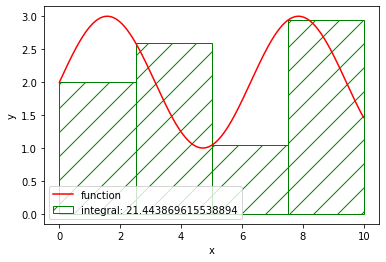

0.16309174650179986


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
import random

def integrateLeftRect(f, a, b, n, draw=True):
    I = 0
    
    if draw:
        fig, ax = plt.subplots()
    
    xs = np.arange(a, b, (b - a) / 1000)
    fs = np.array([f(x) for x in xs])
    
    if draw:
        ax.plot(xs, fs, label = "function", color = "red")
    
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
    for i in range(n):
        xi = a + i * (b - a) / n
        xip1 = a + (i + 1) * (b - a) / n
        
        dx = xip1 - xi
        I += f(xi) * dx

        rect = patches.Rectangle((xi, 0), dx, f(xi), edgecolor='green', facecolor='none', hatch='/')
        
        if draw:
            ax.add_patch(rect)
        
    if draw:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend(["function", "integral: " + str(I)])
        #ax.grid()
        #ax.legend()

        plt.show()
        
    return I

Z = 2

def func(x):
    return math.sin(x)+Z

a = 0
b = 10
N = 4

integrateLeftRect(func, a, b, N)
I = integrateLeftRect(func, a, b, 2*N, False)
I_ = integrateLeftRect(func, a, b, N, False)
print((1/3)*math.fabs(I-I_))


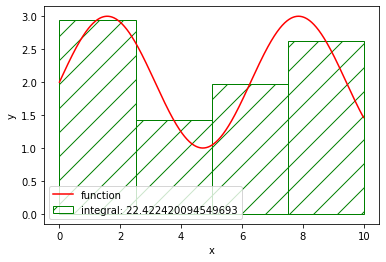

0.15264224597384884


In [15]:
def integrateCenterRect(f, a, b, n, draw=True):
    I = 0
    
    if draw:
        fig, ax = plt.subplots()
    
    xs = np.arange(a, b, (b - a) / 1000)
    fs = np.array([f(x) for x in xs])
    
    if draw:
        ax.plot(xs, fs, label = "function", color = "red")
    
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
    for i in range(n):
        xi = a + i * (b - a) / n
        xip1 = a + (i + 1) * (b - a) / n
        
        Zetta = (xi+xip1)/2
        
        dx = xip1 - xi
        I += f(Zetta) * dx

        rect = patches.Rectangle((xi, 0), dx, f(Zetta), edgecolor='green', facecolor='none', hatch='/')
        
        if draw:
            ax.add_patch(rect)
        
    if draw:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend(["function", "integral: " + str(I)])
        #ax.grid()
        #ax.legend()

        plt.show()
        
    return I
integrateCenterRect(func, a, b, N)
I = integrateCenterRect(func, a, b, 2*N, False)
I_ = integrateCenterRect(func, a, b, N, False)
print((1/3)*math.fabs(I-I_))

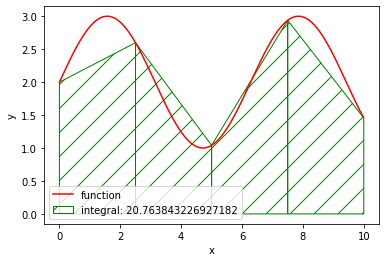

0.2764294779370845


In [14]:
def integrateTrap(f, a, b, n, draw=True):
    I = 0
    
    if draw:
        fig, ax = plt.subplots()
    
    xs = np.arange(a, b, (b - a) / 1000)
    fs = np.array([f(x) for x in xs])
    
    if draw:
        ax.plot(xs, fs, label = "function", color = "red")
    
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
    for i in range(n):
        xi = a + i * (b - a) / n
        xip1 = a + (i + 1) * (b - a) / n
        
        fxi = f(xi)
        fxip1 = f(xip1)
        
        dx = xip1 - xi
        I += 0.5 * (fxi + fxip1) * dx

        if draw:
            ax.add_patch(patches.Polygon(xy=list(zip( [xi, xip1, xip1, xi]  , [0, 0, fxip1, fxi] )), fill=False, color = "green", hatch='/'))
        
    if draw:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend(["function", "integral: " + str(I)])
        #ax.grid()
        #ax.legend()
        
        plt.show()
        
    return I
integrateTrap(func, a, b, N)
I = integrateTrap(func, a, b, 2*N, False)
I_ = integrateTrap(func, a, b, N, False)
print((1/3)*math.fabs(I-I_))

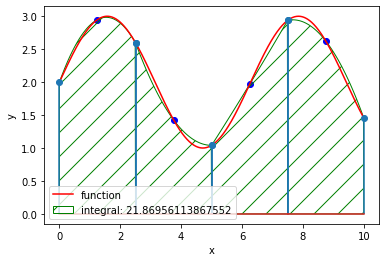

0.001923667600707309


In [12]:
def integrateSimpson(f, a, b, n, draw=True):
    I = 0
    
    if draw:
        fig, ax = plt.subplots()
    
    xs = np.arange(a, b, (b - a) / 1000)
    fs = np.array([f(x) for x in xs])
    
    if draw:
        ax.plot(xs, fs, label = "function", color = "red")
    
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
    for i in range(n):
        xi = a + i * (b - a) / n
        xip1 = a + (i + 1) * (b - a) / n
        xiph = (xi+xip1)/2
        
        fxi = f(xi)
        fxip1 = f(xip1)
        fxiph = f(xiph)
        
        dx = xip1 - xi
        I += (1/6) * (fxi + 4 * fxiph + fxip1) * dx

        xs = np.arange(xi, xip1, 0.01)
        ys = np.array([fxi*(x-xiph)*(x-xip1)/((xi-xiph)*(xi-xip1)) + fxiph * (x-xi)*(x-xip1)/((xiph-xi)*(xiph-xip1)) + fxip1*(x-xi)*(x-xiph)/((xip1-xi)*(xip1-xiph)) for x in xs])
        
        if draw:
            #ax.plot(xs, ys, color = "green", hatch='/')
            xs = np.append(xs, [xip1, xi])
            ys = np.append(ys, [0, 0])
            ax.add_patch(patches.Polygon(xy=list(zip(xs, ys)), fill=False, color = "green", hatch='/'))
            ax.stem([xi, xip1], [fxi, fxip1])
            ax.scatter([xiph], [fxiph], color="blue")
    
    if draw:
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend(["function", "integral: " + str(I)])
        #ax.grid()
        #ax.legend()
        plt.show()
        
    return I
integrateSimpson(func, a, b, N)
I = integrateSimpson(func, a, b, 2*N, False)
I_ = integrateSimpson(func, a, b, N, False)
print((1/15)*math.fabs(I-I_))

In [1]:
#Решение Интеграла 9.7 формулой трапеций
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

e = 10**(-6)


E = 1000
p1 = 2
dW = 1 #задание равномерной сетки
while (e < E):
    dW = dW/2
    s = 0
    s1 = 0
    s2 = 0
    N = int(9 / dW)
    W = np.zeros((N + 1))
    f = np.zeros((N + 1))

    for i in range(1, N + 1, 1):
        W[i] = i * dW
        f[i] = (np.log(1 + W[i]) - W[i] + (W[i] * W[i])/2 - (W[i] * W[i] * W[i])/3 ) / (W[i] * np.sqrt(W[i]))
        
    for j in range(1, N, 1):
        s += dW/2 * (f[j] + f[j + 1])
        
    
#    ddf = np.diff(f, n = 2)
#    q = np.amax(ddf) 
#    E = abs(3/4 * dW*dW * q) 
    
    dW1 = dW/2
    N1 = int(9 / dW1)
    W1 = np.zeros((N1 + 1))
    f1 = np.zeros((N1 + 1))

    for i in range(1, N1 + 1, 1):
        W1[i] = i * dW1
        f1[i] = (np.log(1 + W1[i]) - W1[i] + (W1[i] * W1[i])/2 - (W1[i] * W1[i] * W1[i])/3 ) / (W1[i] * np.sqrt(W1[i]))
    for j in range(1, N1, 1):
        s1 += dW1/2 * (f1[j] + f1[j + 1])
        
    dW2 = dW * 2
    N2 = int(9 / dW2)
    W2 = np.zeros((N2 + 1))
    f2 = np.zeros((N2 + 1))

    for i in range(1, N2 + 1, 1):
        W2[i] = i * dW2
        f2[i] = (np.log(1 + W2[i]) - W2[i] + (W2[i] * W2[i])/2 - (W2[i] * W2[i] * W2[i])/3 ) / (W2[i] * np.sqrt(W2[i]))
    for j in range(1, N2, 1):
        s2 += dW2/2 * (f2[j] + f2[j + 1])
    
    E = (s1 - s) / (2**p1 - 1)
    E2h = (s - s2) / (2**p1 - 1)
    p = np.log2(E2h / E)
    p1 = p
    
    
print("Шаг равномерной сетки равен:", dW)

#вычисление интеграла

s += 29.4
s1 += 29.4
print("Точность равна:", e)
print("Значение интеграла равно:", s1)
print("Погрешность по правилу Рунге равна:", E)
print("Порядок сходимости:", p)

Шаг равномерной сетки равен: 0.00390625
Точность равна: 1e-06
Значение интеграла равно: 3.46112591317036
Погрешность по правилу Рунге равна: 4.486073350959271e-07
Порядок сходимости: 1.999187173543447
